In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/voice.csv')

print('shape of the data set: ',df.shape)
print('columns: ',df.columns.tolist())

df.head(5)

shape of the data set:  (3168, 21)
columns:  ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [25]:
print(df.columns)

print(df['label'].unique())

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')
['male' 'female']


In [26]:
df['label'] = df['label'].str.strip().str.lower()

In [27]:
df['label']=df['label'].map({'male':0,'female':1})
df['label_text'] = df['label'].map({0:'Male',1:{'Female'}})
df['label'].unique()

array([0, 1])

In [28]:
df.isnull().sum()


,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
skew,0
kurt,0
sp.ent,0
sfm,0


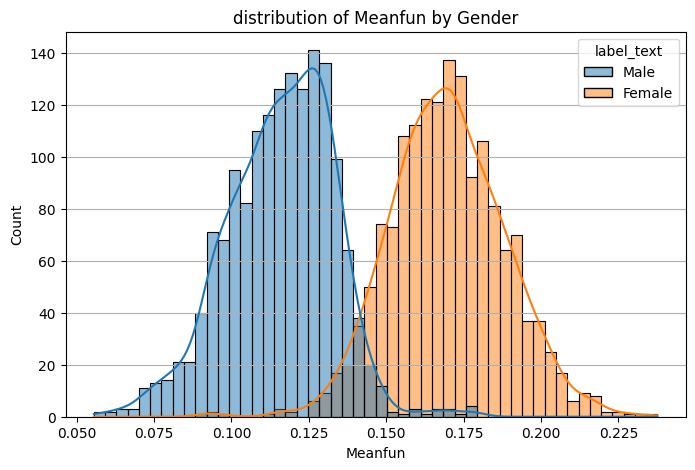

In [30]:
plt.figure(figsize=(8,5))
df['label_text']=df['label'].map({0:'Male',1:'Female'})

sns.histplot(data=df,x='meanfun',hue='label_text',bins=50,kde=True)
plt.grid(axis='y')
plt.title('distribution of Meanfun by Gender')
plt.xlabel('Meanfun')
plt.ylabel('Count')
plt.show()

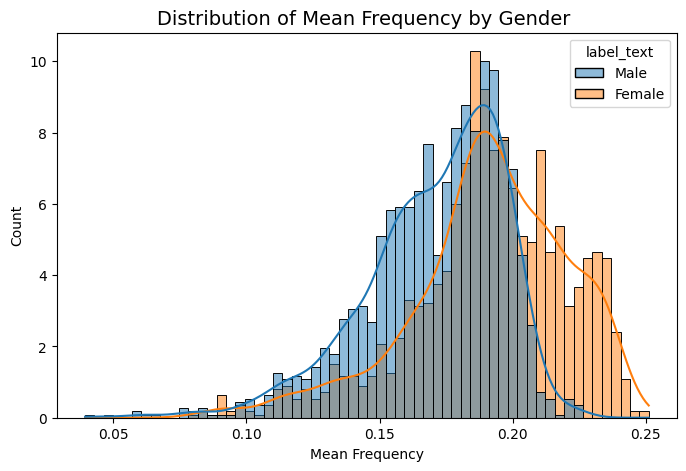

In [31]:
import seaborn as sns

plt.figure(figsize=(8,5))

sns.histplot(data=df,x='meanfreq',hue='label_text',bins=60,kde=True,stat='density')
plt.title("Distribution of Mean Frequency by Gender ",fontsize=14)
plt.xlabel('Mean Frequency')
plt.ylabel('Count')
plt.show()

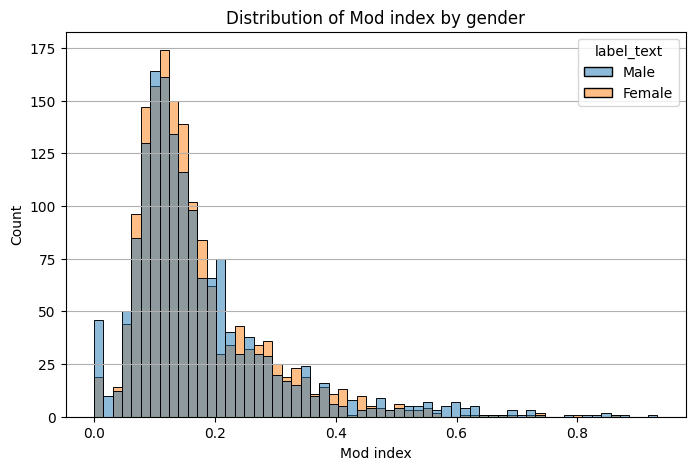

In [32]:
plt.figure(figsize=(8,5))

sns.histplot(data=df,x='modindx',hue='label_text',bins=60,kde=False)
plt.grid(True,which='both',axis="y")
plt.title("Distribution of Mod index by gender")
plt.xlabel("Mod index")
plt.ylabel("Count")
plt.show()

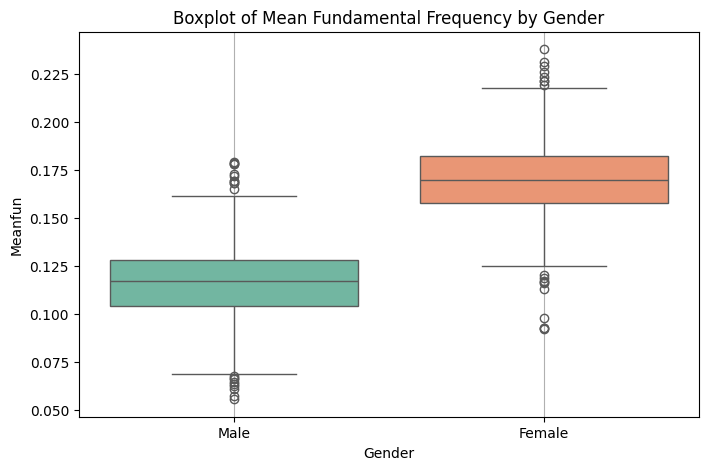

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='label_text',y='meanfun',hue='label_text',palette='Set2')
plt.title('Boxplot of Mean Fundamental Frequency by Gender',fontsize=12)
plt.xlabel('Gender')
plt.ylabel('Meanfun')
plt.grid(True,axis='x')
plt.show()

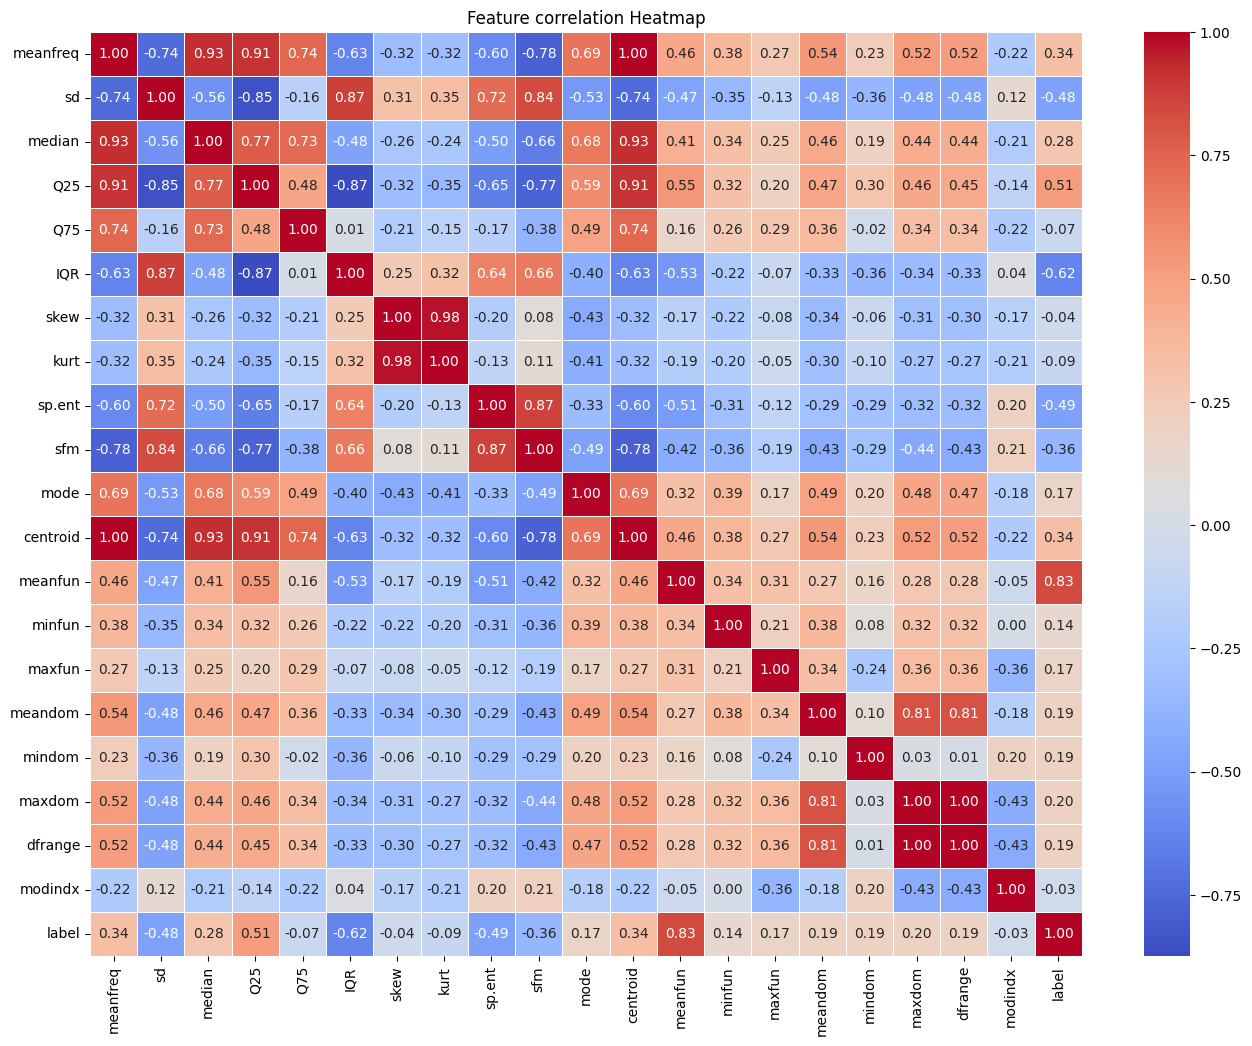

In [34]:
plt.figure(figsize=(16,12))
numeric_df=df.drop(columns=['label_text'])
corr=numeric_df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidth=0.5)
plt.title('Feature correlation Heatmap')
plt.show()


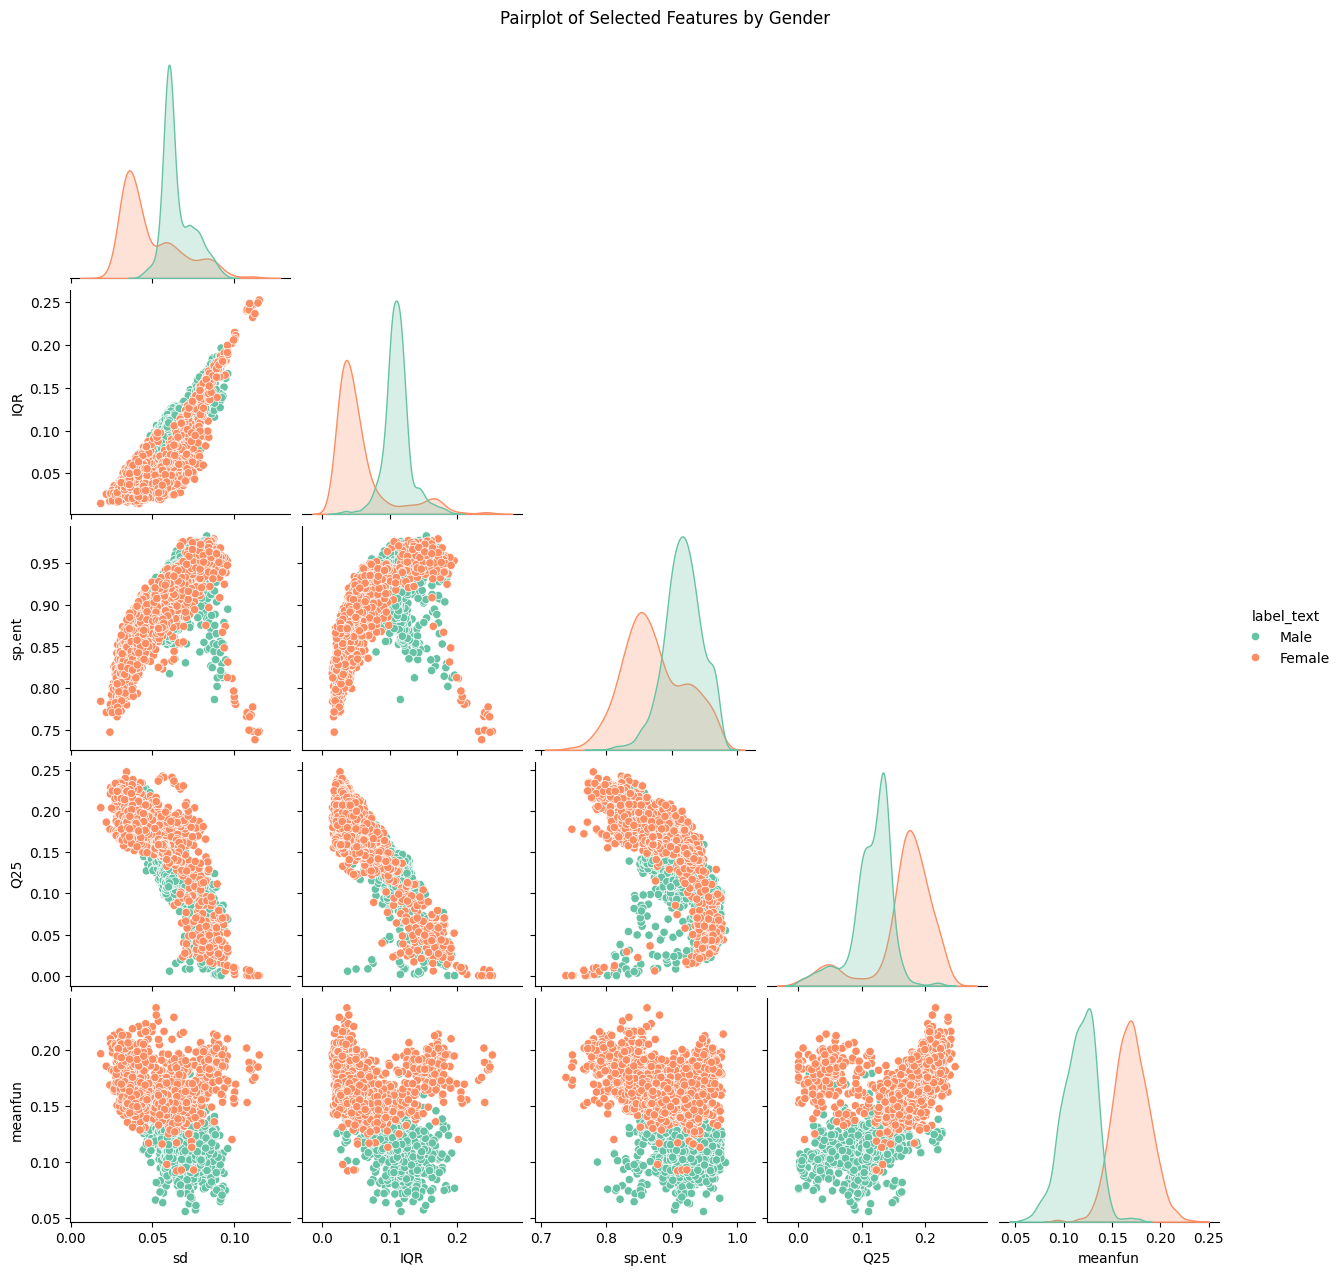

In [35]:
top_text = ['sd','IQR','sp.ent','Q25','meanfun','label_text']

sns.pairplot(df[top_text],hue='label_text',corner=True,palette='Set2')
plt.suptitle('Pairplot of Selected Features by Gender',y=1.02)
plt.show()


In [36]:
from sklearn.model_selection import train_test_split

x=df.drop(columns=['label','label_text'])
y=df['label']

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [38]:
from sklearn.metrics import accuracy_score , classification_report


y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Model Accuracy: {accuracy:.2f}')


print("\nClassification Report:")
print(classification_report(y_test,y_pred, target_names=['Male','Female']))



Model Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

        Male       0.90      0.97      0.93       337
      Female       0.96      0.88      0.92       297

    accuracy                           0.93       634
   macro avg       0.93      0.92      0.93       634
weighted avg       0.93      0.93      0.93       634



In [39]:
from sklearn.ensemble import RandomForestClassifier



rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
rf_preds = rf_model.predict(x_test)

rf_accuracy = accuracy_score(y_test,rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print('\Classification Report:')
print(classification_report(y_test,rf_preds,target_names=['Males','Females']))

Random Forest Accuracy: 0.98
\Classification Report:
              precision    recall  f1-score   support

       Males       0.99      0.98      0.99       337
     Females       0.97      0.99      0.98       297

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



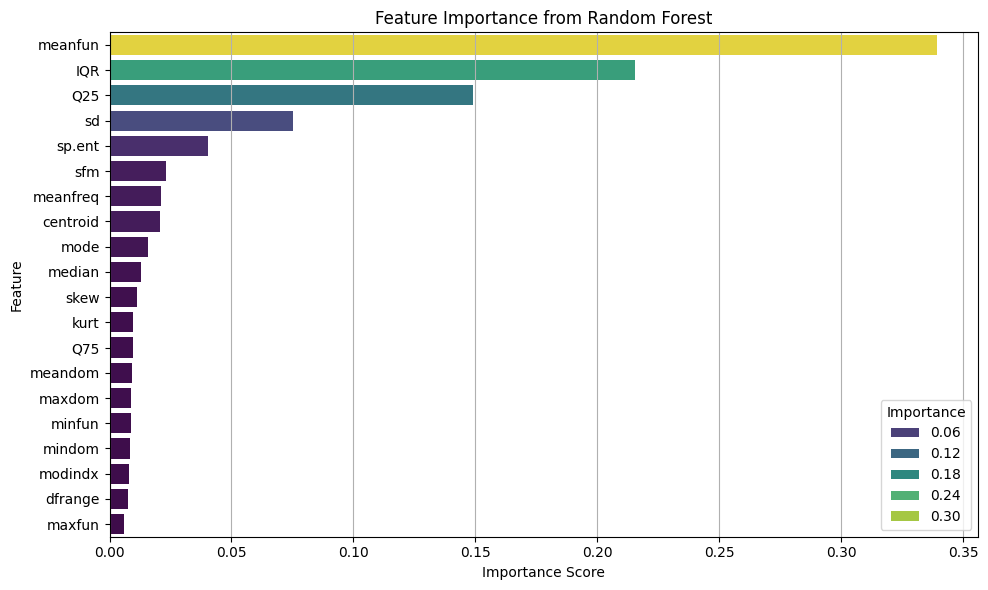

In [41]:
importance = rf_model.feature_importances_


feature_names= x.columns
feat_imp_df = pd.DataFrame({'Feature':feature_names,'Importance':importance})

feat_imp_df = feat_imp_df.sort_values(by='Importance',ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feat_imp_df,hue='Importance',palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True,axis='x')
plt.tight_layout()
plt.show()